**Puria Azadi Moghadam -------- Student no: 301406080
Assignment 2

## Deep Learning Course (980)
## Assignment Two: Convolutional Neural Networks

__Assignment Goals__:
- Design and implementation of CNNs.
- Understanding the different effects of linear and nonlinear activation functions.
- CNN visualization.

In this assignment, you will be asked to learn a CNN model for an image dataset. Different experiments will help you achieve a better understanding of CNNs. 

__DataSet__: the dataset consists of around 9K images (some grayscale and some RGB) belonging to 101 classes. The shape of each image is (64,64,3). Every image is labeled with one of the classes. The image file is contained in the folder named after the class name.

1. We are aiming to lean a CNN on the dataset. Download the dataset, and use TensorFlow to implement LeNet5 to classify instances. Use a one-hot encoding for labels. Split the dataset into training (90 percent) and validation (10 percent) and report the model loss (cross-entropy) and accuracy on both sets. Try to improve model accuracy on the validation dataset by tuning the model hyperparameters. You can use regularization to prevent overfitting. The model performance is a part of the overall evaluation (35 points). The LeNet5 configuration is:
  - Convolutional layer (kernel size 5 x 5, 32 filters, stride 1 x 1 and followed by ReLU)
  - Max Pooling layer subsampling by 4 and stride 4 x 4 
  - Convolutional layer (kernel size 5 x 5, 64 filters, stride 1 x 1 and followed by ReLU)
  - Max Pooling layer subsampling by 4 and stride 4 x 4
  - Fully Connected ReLU layer that has input 7764 and output 1024 
  - Fully Connected ReLU layer that has input 1024 and output 84 
  - Fully Connected Softmax layer that has input 84 and output which is equal to the number of classes (one node for each of the classes).
2. What happens if we use a linear activation function in all convolutions and dense layers (except softmax in the last fully connected layer)? Compare training and validation loss (cross-entropy) after and before changing the activation function. Can we compensate for the effect of removing the non-linear activation function by adding more convolution linear layers? Explain your answer. (20 points)
3. There are several approaches to understand and visualize convolutional Networks, including visualizing the activations and layers weights. The most straight-forward visualization technique is to show the activations of the network during the forward pass. The second most common strategy is to visualize the weights. The weights are useful to visualize because well-trained networks usually display nice and smooth filters without any noisy patterns.  Please visualize the filters (i.e., the first layer convolution weights) which your CNN has learned for this task. Use the trained non-linear CNN model which you implemented in section 1. (Reference: for more information we recommend the course notes on "Visualizing what ConvNets learn" http://cs231n.github.io/understanding-cnn/. More advanced techniques can be found in "Visualizing and Understanding Convolutional Networks" paper by Matthew D.Zeiler and Rob Fergus.) (35 points)

__NOTE__: Please use Jupyter Notebook. The notebook should include the final code, results and your answers. You should submit your Notebook in (.pdf or .html) and .ipynb format. (10 points) 

__Instructions__:

The university policy on academic dishonesty and plagiarism (cheating) will be taken very seriously in this course. Everything submitted should be your own writing or coding. You must not let other students copy your work. Spelling and grammar count.

Your assignments will be marked based on correctness, originality (the implementations and ideas are from yourself), clarification and test performance.


***please set "os.chdir" address as the folder in which the code and the dataset are there.***

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from matplotlib.image import imread
import sklearn
import os
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import numpy as np
from time import time
tf.keras.backend.clear_session()

os.chdir('C:/Users/asus/CA2') 
classes = os.listdir("101_ObjectCategories_resized") 
X_all = []
Y_all = []
c=0
for ind_class in (classes):
    for file in os.listdir("101_ObjectCategories_resized/" + ind_class): 
        img_name = os.path.join("101_ObjectCategories_resized/" + ind_class+"/"+file)
        img = imread(img_name)       
        X_all.append(img)
        Y_all.append(c)
    c=c+1     
X_all = np.array(X_all)
Y_all = np.array(Y_all)
print(np.shape(X_all))
print(np.shape(Y_all))


(8677, 64, 64, 3)
(8677,)


In [153]:
# Y_all = tf.nn.embedding_lookup(np.identity(101), Y_all)
Y_all=np.eye(101)[Y_all]
print(Y_all.shape)
X_tr,X_test,Y_tr,Y_test = sklearn.model_selection.train_test_split(X_all,Y_all, train_size =0.9,shuffle = True)
# Y_tr=tf.one_hot(Y_tr, 101)
# Y_test=tf.one_hot(Y_test, 101)
print((Y_tr.shape))
DataGenerator = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
train_generator = DataGenerator.flow(X_tr, Y_tr, batch_size=64)
valid_generator = DataGenerator.flow(X_test, Y_test, batch_size=64)

(8677, 101)
(7809, 101)


In [133]:
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=5, activation='relu',strides=(1, 1), input_shape=(64,64,3), kernel_regularizer=keras.regularizers.l2(0.001),
               bias_regularizer = keras.regularizers.l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=(4,4)))

model.add(Conv2D(64, kernel_size=5, activation='relu',strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001),
                bias_regularizer = keras.regularizers.l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=(4,4)))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),
                 bias_regularizer = keras.regularizers.l2(0.001)))
model.add(Dense(84, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001),
                 bias_regularizer = keras.regularizers.l2(0.001)))
model.add(Dense(101, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 1024)              590848    
_________________________________________________________________
dense_32 (Dense)             (None, 84)                86100     
__________

In [134]:
# adam = keras.optimizers.Adam(lr=0.001)
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
#model.fit(X_tr, Y_tr, validation_split=0.1, epochs=150, batch_size=100)
model.fit_generator(train_generator, steps_per_epoch=X_tr.shape[0]//64, epochs=100, validation_data=valid_generator, validation_steps=X_test.shape[0]//64, shuffle=True)

Epoch 1/100
122/122 [==============================] - 25s 203ms/step - loss: 4.2033 - acc: 0.2036 - val_loss: 3.6025 - val_acc: 0.2824
Epoch 2/100
122/122 [==============================] - 23s 186ms/step - loss: 3.2857 - acc: 0.3442 - val_loss: 2.9636 - val_acc: 0.4235
Epoch 3/100
122/122 [==============================] - 23s 190ms/step - loss: 2.7132 - acc: 0.4454 - val_loss: 2.7284 - val_acc: 0.4450
Epoch 4/100
122/122 [==============================] - 22s 184ms/step - loss: 2.3782 - acc: 0.5121 - val_loss: 2.4945 - val_acc: 0.4968
Epoch 5/100
122/122 [==============================] - 23s 185ms/step - loss: 2.0749 - acc: 0.5728 - val_loss: 2.3153 - val_acc: 0.5388
Epoch 6/100
122/122 [==============================] - 23s 189ms/step - loss: 1.8896 - acc: 0.6254 - val_loss: 2.2506 - val_acc: 0.5741
Epoch 7/100
122/122 [==============================] - 24s 195ms/step - loss: 1.7171 - acc: 0.6688 - val_loss: 2.2523 - val_acc: 0.5938
Epoch 8/100
122/122 [===========================

Epoch 61/100
122/122 [==============================] - 23s 192ms/step - loss: 0.5537 - acc: 0.9393 - val_loss: 2.8667 - val_acc: 0.5568
Epoch 62/100
122/122 [==============================] - 23s 190ms/step - loss: 0.7404 - acc: 0.9120 - val_loss: 2.8849 - val_acc: 0.6028
Epoch 63/100
122/122 [==============================] - 23s 189ms/step - loss: 0.5706 - acc: 0.9684 - val_loss: 3.0462 - val_acc: 0.6002
Epoch 64/100
122/122 [==============================] - 23s 191ms/step - loss: 0.4766 - acc: 0.9920 - val_loss: 2.9164 - val_acc: 0.6230
Epoch 65/100
122/122 [==============================] - 23s 189ms/step - loss: 0.4107 - acc: 0.9992 - val_loss: 2.8239 - val_acc: 0.6159
Epoch 66/100
122/122 [==============================] - 23s 190ms/step - loss: 0.3668 - acc: 0.9996 - val_loss: 2.8176 - val_acc: 0.6108
Epoch 67/100
122/122 [==============================] - 23s 189ms/step - loss: 0.3400 - acc: 0.9993 - val_loss: 2.6323 - val_acc: 0.6159
Epoch 68/100
122/122 [===================

*The Best Validation Error is 0.6448 in epoch75:*
Epoch 57/100
122/122 [==============================] - 23s 191ms/step - loss: 0.3915 - acc: 0.9993 - val_loss: 2.5611 - val_acc: 0.6448

In [139]:
model2 = keras.Sequential()
model2.add(Conv2D(32, kernel_size=5, strides=(1, 1), input_shape=(64,64,3), kernel_regularizer=keras.regularizers.l2(0.001),
                 bias_regularizer = keras.regularizers.l2(0.001)))
model2.add(MaxPool2D(pool_size=(2,2), strides=(4,4)))

model2.add(Conv2D(64, kernel_size=5, strides=(1, 1), kernel_regularizer=keras.regularizers.l2(0.001),
                 bias_regularizer = keras.regularizers.l2(0.001)))
model2.add(MaxPool2D(pool_size=(2,2), strides=(4,4)))
model2.add(Flatten())
model2.add(Dense(1024,  kernel_regularizer=keras.regularizers.l2(0.001),
                 bias_regularizer = keras.regularizers.l2(0.001)))
model2.add(Dense(84, kernel_regularizer=keras.regularizers.l2(0.001),
                 bias_regularizer = keras.regularizers.l2(0.001)))
model2.add(Dense(101, activation='softmax'))
print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        51264     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              590848    
_________________________________________________________________
dense_35 (Dense)             (None, 84)                86100     
__________

In [140]:
adam = keras.optimizers.Adam(lr=0.005)
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
#model.fit(X_tr, Y_tr, validation_split=0.1, epochs=150, batch_size=100)
model2.fit_generator(train_generator, steps_per_epoch=X_tr.shape[0]//64, epochs=100, validation_data=valid_generator, validation_steps=X_test.shape[0]//64, shuffle=True)

Epoch 1/100
122/122 [==============================] - 25s 202ms/step - loss: 3.9280 - acc: 0.3389 - val_loss: 3.1104 - val_acc: 0.4725
Epoch 2/100
122/122 [==============================] - 22s 177ms/step - loss: 2.7573 - acc: 0.5132 - val_loss: 2.7373 - val_acc: 0.5063
Epoch 3/100
122/122 [==============================] - 21s 173ms/step - loss: 2.1608 - acc: 0.6204 - val_loss: 2.3830 - val_acc: 0.5793
Epoch 4/100
122/122 [==============================] - 21s 175ms/step - loss: 1.7857 - acc: 0.6972 - val_loss: 2.3418 - val_acc: 0.5986
Epoch 5/100
122/122 [==============================] - 21s 170ms/step - loss: 1.6400 - acc: 0.7241 - val_loss: 2.5403 - val_acc: 0.5899
Epoch 6/100
122/122 [==============================] - 22s 176ms/step - loss: 1.4161 - acc: 0.7851 - val_loss: 2.3886 - val_acc: 0.6125
Epoch 7/100
122/122 [==============================] - 20s 166ms/step - loss: 1.3152 - acc: 0.8074 - val_loss: 2.6561 - val_acc: 0.5891
Epoch 8/100
122/122 [===========================

Epoch 61/100
122/122 [==============================] - 21s 175ms/step - loss: 0.3388 - acc: 0.9994 - val_loss: 2.2851 - val_acc: 0.6569
Epoch 62/100
122/122 [==============================] - 21s 175ms/step - loss: 0.3454 - acc: 0.9984 - val_loss: 2.5959 - val_acc: 0.6100
Epoch 63/100
122/122 [==============================] - 21s 175ms/step - loss: 0.5089 - acc: 0.9529 - val_loss: 3.0821 - val_acc: 0.5797
Epoch 64/100
122/122 [==============================] - 21s 175ms/step - loss: 1.2273 - acc: 0.8020 - val_loss: 3.7453 - val_acc: 0.5672
Epoch 65/100
122/122 [==============================] - 21s 176ms/step - loss: 0.8420 - acc: 0.9124 - val_loss: 3.2688 - val_acc: 0.6285
Epoch 66/100
122/122 [==============================] - 21s 172ms/step - loss: 0.5652 - acc: 0.9847 - val_loss: 2.9732 - val_acc: 0.6084
Epoch 67/100
122/122 [==============================] - 21s 175ms/step - loss: 0.4601 - acc: 0.9992 - val_loss: 2.7899 - val_acc: 0.6262
Epoch 68/100
122/122 [===================

The Best Validation Error for all linear activation function mode is 0.6569:
Epoch 61/100
122/122 [==============================] - 21s 175ms/step - loss: 0.3388 - acc: 0.9994 - val_loss: 2.2851 - val_acc: 0.6569



As it can be seen above, using linear activation function instead of "relu" resulted in the validation accuracy of 0.6569 although we have expected that the validation accuracy go down by using linear layers. It is about 1 percent more than the first model(with "relu") accuracy. Three are two facts regaring these accuracies. First, it seams that the first model(with "relu") is overfitted. So, by using linear model, the capacity of network decreased and it resulted in the higher validation accuracy. Second, as all the layers' activation functions are linear and the validation accuracy is a little higher in linear model(overally the val accuracy in both model they are very close to each other), the dataset probably is  linear seperable.

Adding more linear Layers will make no difference since Combination of linear functions and linear classifiers will still be linear.Therfore the neural network with more linear layer can not make much difference for the validation accuracy.

**The weigths of first layer are as below:

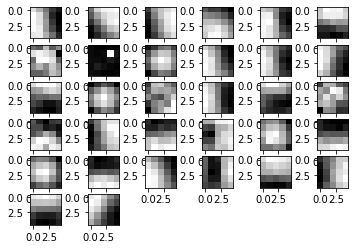

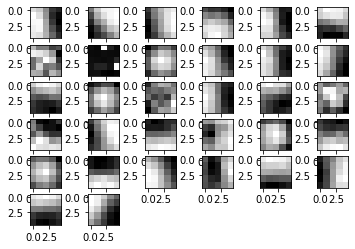

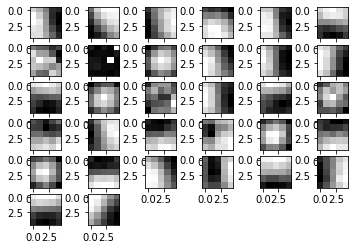

(5, 5, 32)


In [155]:
for j in range(3):
    w = model.get_weights()[0][:,:,j,:]
    for i in range(32):
        plt.subplot(6,6,i+1)
        plt.imshow(w[:,:,i],interpolation="nearest",cmap="gray")
    plt.show()
# x1w = model.get_weights()[0]
print(w.shape)

**The weigths of second layer are as below: 

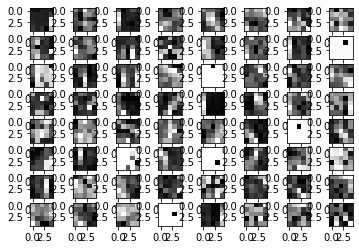

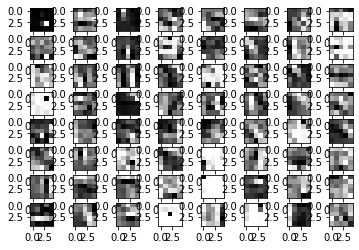

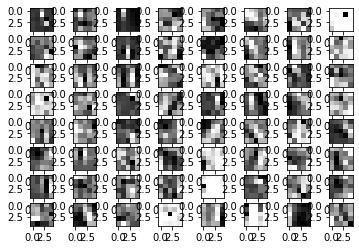

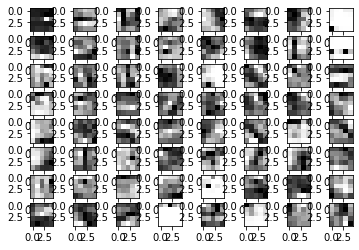

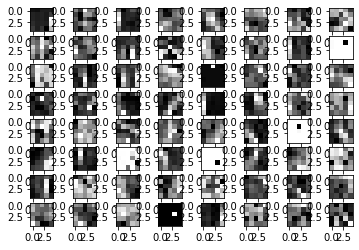

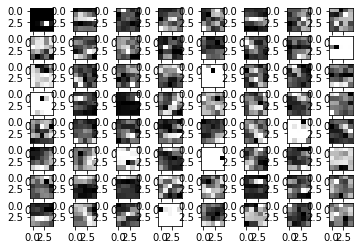

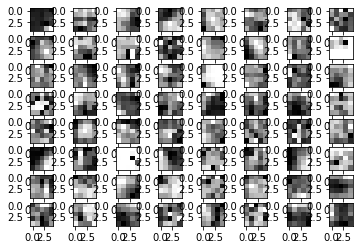

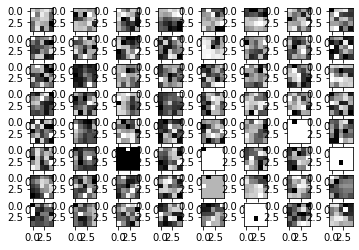

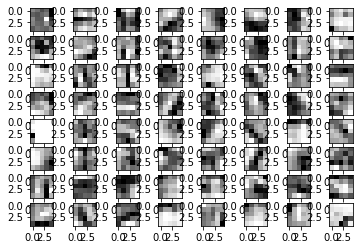

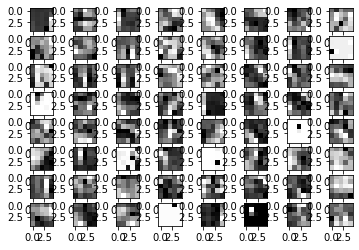

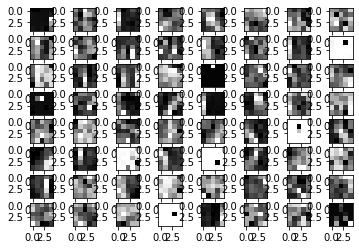

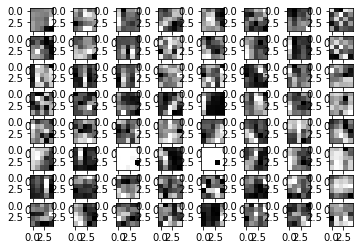

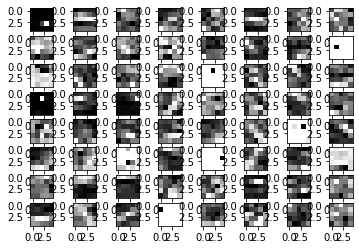

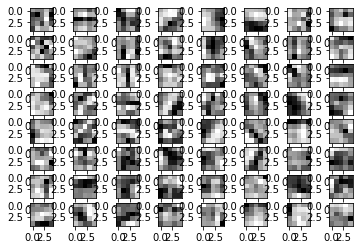

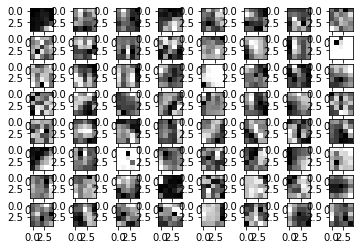

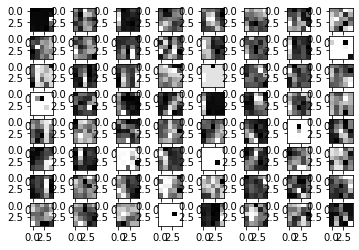

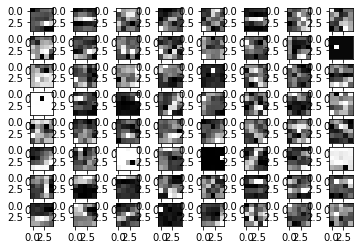

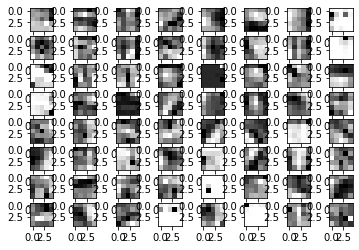

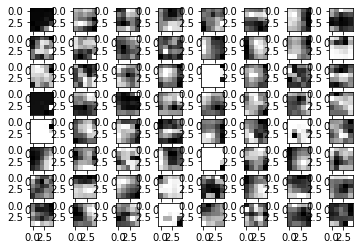

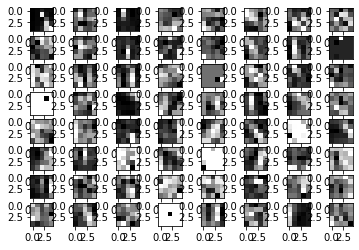

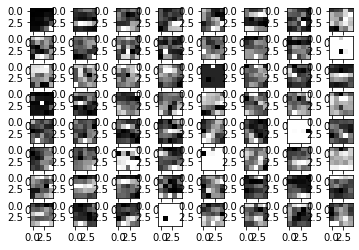

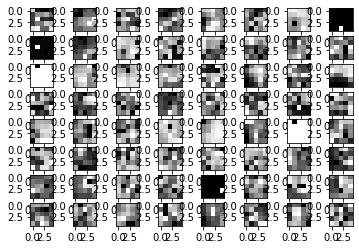

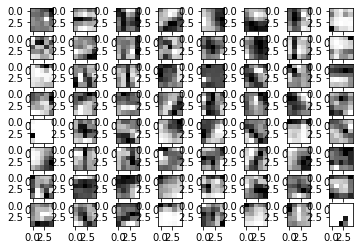

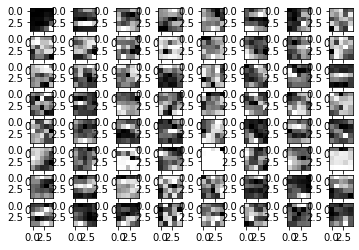

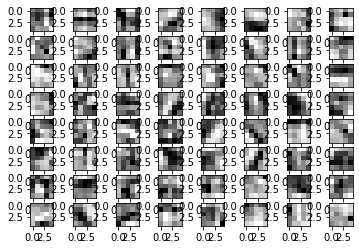

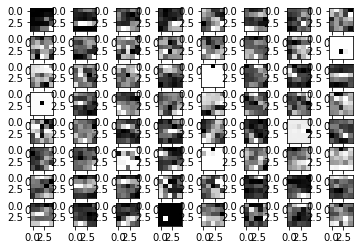

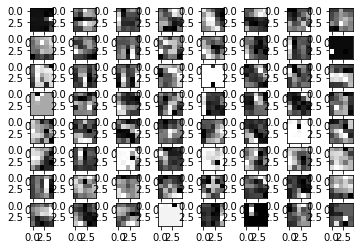

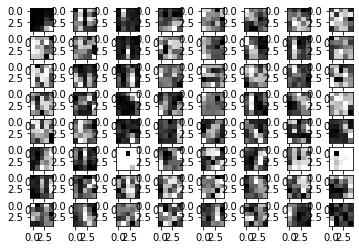

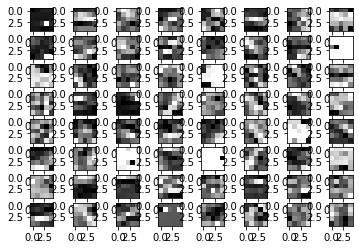

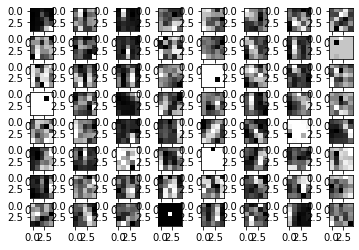

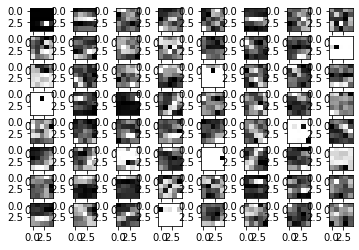

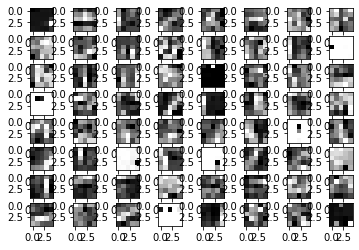

In [137]:
for j in range(32):
    w = model.get_weights()[2][:,:,j,:]
    for i in range(64):
        plt.subplot(8,8,i+1)
        plt.imshow(w[:,:,i],interpolation="nearest",cmap="gray")
    plt.show()
# x1w = model.get_weights()[0]
# print(x1w.shape)